# Public Satellite Data

This is a Binder to show and play with the 
<a href="https://www.ucsusa.org/resources/satellite-database">
    Union of Concerned Scientists Satellite Database.
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

%matplotlib inline

## Data Wrangling

Aka Import and Cleaning

In [2]:
data_url = 'https://s3.amazonaws.com/ucs-documents/nuclear-weapons/sat-database/5-9-19-update/UCS_Satellite_Database_4-1-2019.txt'
df = pd.read_csv(data_url, sep='\t', header=0, encoding="ISO-8859-1", parse_dates=[18])
print("Rows: %d" % len(df))
print("Columns: %d" % len(df.columns))
df.head()

Rows: 2062
Columns: 254


,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Columns: 254 entries, Name of Satellite, Alternate Names to Unnamed: 253
dtypes: datetime64[ns](1), float64(219), int64(1), object(33)
memory usage: 4.0+ MB


### Clean Data

In [4]:
df = df.dropna(axis=1, how='all')
print("Rows: %d" % len(df))
print("Columns: %d" % len(df.columns))
df.head()

Rows: 2062
Columns: 39


,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Source,Source.1,Source.2,Source.3,Source.4,Source.5,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 64
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,https://spaceflightnow.com/2018/11/29/indian-r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,...,https://directory.eoportal.org/web/eoportal/sa...,http://www.planet4589.org/space/log/satcat.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,http://spaceflightnow.com/2016/04/26/soyuz-bla...,http://space50.org/objekt.php?mot=2016-025E&ja...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,http://www.absatellite.net/satellite-fleet/?sa...,http://www.zarya.info/Diaries/Launches/Launche...,http://www.absatellite.net/2010/10/13/asia-bro...,http://www.spacenews.com/article/satellite-tel...,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Investigation (can skip)

Why are there 5 source columns? Can I just merge them?

Why did some unnamed columns survive?

In [ ]:
df.iloc[:,-9:]

In [ ]:
def return_value_counts(df, col):
    return df[col].value_counts()

In [ ]:
return_value_counts(df, 'Source.5')

In [ ]:
return_value_counts(df, 'Unnamed: 58')

Let's see if the rows that have Source 5 also have the unnamed entries.

No entry that uses Source 5 uses any of the remaining Unnamed columns

In [ ]:
df.loc[df["Source.5"].notna()]

Let's check the inverse

Okay. All of these are links / sources. There is not enough space to move them sideways into the empty source columns, actually.

Checking Unnamed 58 and 59 yield the same rows. 60 and 64 are subsets of 58 and 59.

If JM/304 and JMSatcat84 don't mean anything, then I can scrap the last column and shuffle over the rest of the links with no problems.

In [ ]:
df.loc[df["Unnamed: 58"].notna()]

In [ ]:
df.loc[df["Unnamed: 64"].notna()]

In [ ]:
df.loc[940]

In [ ]:
df.info()

### Back to data cleaning

Will need to reformat some columns to remove commas. The commas prevent recasting to float.

In [5]:
# Can't do "Power (watts)" because there are letters in at least one entry
# Can't do "Dry Mass (kg.)" because there is a range in at least one entry
cols_to_un_comma = ["Perigee (km)", "Apogee (km)", "Period (minutes)", "Launch Mass (kg.)"]

for col in cols_to_un_comma:
    df.loc[:, col] = df[col].str.replace(',', '').astype(float)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 39 columns):
Name of Satellite, Alternate Names    2062 non-null object
Country/Org of UN Registry            2062 non-null object
Country of Operator/Owner             2062 non-null object
Operator/Owner                        2062 non-null object
Users                                 2062 non-null object
Purpose                               2062 non-null object
Detailed Purpose                      790 non-null object
Class of Orbit                        2062 non-null object
Type of Orbit                         1457 non-null object
Longitude of GEO (degrees)            2062 non-null float64
Perigee (km)                          2062 non-null float64
Apogee (km)                           2062 non-null float64
Eccentricity                          2062 non-null float64
Inclination (degrees)                 2062 non-null float64
Period (minutes)                      2062 non-null float64
Lau

### Fix the Users column

This should be a set of categorical columns. 0 or 1 for each of Commercial, Government, Military, Civil

In [7]:
df.Users.unique()

array(['Civil', 'Commercial', 'Military', 'Government',
       'Military/Commercial', 'Government/Civil', 'Government/Military',
       'Military/Government', 'Military/Civil', 'Civil/Government',
       'Government/Commercial', 'Commercial/Government',
       'Government/Commercial/Military', 'Commercial ',
       'Commercial/Military', 'Military '], dtype=object)

In [8]:
user_types = ['Civil', 'Commercial', 'Military', 'Government']

In [9]:
user_col_names = []

for user_type in user_types:
    user_col_names.append(user_type + '_user')

user_col_names

['Civil_user', 'Commercial_user', 'Military_user', 'Government_user']

In [10]:
for user_type in user_types:
    col_name = user_type + '_user'
    df.loc[:, col_name] = df.loc[:, 'Users'].str.contains(user_type)

In [11]:
df[['Users']].join(df.iloc[:, -4:]).tail(20)

,Users,Civil_user,Commercial_user,Military_user,Government_user
2042,Military,False,False,True,False
2043,Commercial,False,True,False,False
2044,Military,False,False,True,False
2045,Military/Government,False,False,True,True
2046,Government/Commercial,False,True,False,True
2047,Government/Commercial,False,True,False,True
2048,Government/Commercial,False,True,False,True
2049,Government/Commercial,False,True,False,True
2050,Government,False,False,False,True
2051,Government/Commercial,False,True,False,True


### Fix the Purpose Column

In [12]:
df.Purpose.unique()

array(['Technology Development', 'Earth Observation', 'Communications',
       'Technology Demonstration', 'Earth Science',
       'Communications/Technology Development',
       'Communications/Maritime Tracking', 'Space Science',
       'Technlogy Development', 'Navigation/Global Positioning',
       'Earth Science/Space Science',
       'Earth Observation/Technology Development', 'Earth Observation ',
       'Earth Observation/Communications', 'Space Observation',
       'Educational', 'Technology Development/Education',
       'Earth Observation/Earth Science',
       'Earth Observation/Space Science', 'Communications/Navigation',
       'Surveillance', 'Navigation/Regional Positioning',
       'Space Science/Technology Development',
       'Earth Science/Earth Observation',
       'Earth Observation/Communications/Space Science',
       'Technology Development/Educational'], dtype=object)

There is an extra space in one of the purposes, we can use .str.strip() to make that not a problem

In [13]:
purpose_cols = df.Purpose.str.strip().str.split(pat='/', n=0, expand=True).stack().unique()
purpose_cols

array(['Technology Development', 'Earth Observation', 'Communications',
       'Technology Demonstration', 'Earth Science', 'Maritime Tracking',
       'Space Science', 'Technlogy Development', 'Navigation',
       'Global Positioning', 'Space Observation', 'Educational',
       'Education', 'Surveillance', 'Regional Positioning'], dtype=object)

Note the mispelling of "Technology Development." Human-labeled data woo! Push that col into the proper one

In [14]:
purpose_cols[7]

'Technlogy Development'

In [15]:
for purpose_col in purpose_cols:
    df.loc[:, purpose_col] = df.loc[:, "Purpose"].str.contains(purpose_col)
    
df[["Purpose"]].join(df[purpose_cols])[80:90]

,Purpose,Technology Development,Earth Observation,Communications,Technology Demonstration,Earth Science,Maritime Tracking,Space Science,Technlogy Development,Navigation,Global Positioning,Space Observation,Educational,Education,Surveillance,Regional Positioning
80,Communications/Maritime Tracking,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
81,Communications/Technology Development,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
82,Communications/Maritime Tracking,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
83,Communications/Maritime Tracking,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
84,Communications,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
85,Communications,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
86,Communications/Maritime Tracking,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
87,Communications/Maritime Tracking,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False
88,Communications,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
89,Communications,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


Fix the spelling error

In [16]:
df[["Technology Development", "Technlogy Development"]][df["Technlogy Development"]]

,Technology Development,Technlogy Development
131,False,True


In [17]:
df.loc[:, "Technology Development"] = (df["Technology Development"] | df["Technlogy Development"])
df[["Technology Development", "Technlogy Development"]][df["Technlogy Development"]]

,Technology Development,Technlogy Development
131,True,True


Remove that misspelled column from the data and the list of purpose columns

In [18]:
df = df.drop(labels="Technlogy Development", axis='columns')
purpose_cols = np.delete(purpose_cols, np.where(purpose_cols == "Technlogy Development"))

## Exploratory Data Analysis

Let's remind ourselves of what we are looking at

In [19]:
df.head()

,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Earth Science,Maritime Tracking,Space Science,Navigation,Global Positioning,Space Observation,Educational,Education,Surveillance,Regional Positioning
0,3Cat-1,NR (11/18),Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,...,False,False,False,False,False,False,False,False,False,False
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,...,False,False,False,False,False,False,False,False,False,False
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,...,False,False,False,False,False,False,False,False,False,False
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,...,False,False,False,False,False,False,False,False,False,False
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,...,False,False,False,False,False,False,False,False,False,False


In [20]:
df.columns

Index(['Name of Satellite, Alternate Names', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 64', 'Civil_user', 'Commercial_user',
       'Military_user', 'Government_user', 'Technology Development',
       'Earth Observation', 'Communications', 'Technology Demonstration',
       'Earth Science', 'Maritim

In [21]:
# Generic barh plot function
def plot_barh(df, ycol, title, limit=-1, figsize=(8,6)):
    _ = plt.figure(figsize=figsize)
    _ = df[ycol].value_counts()[:limit].plot(kind='barh')
    _ = plt.xlabel("Number of Satellites")
    _ = plt.title(title)
    return _

How many satellites serve similar purposes?

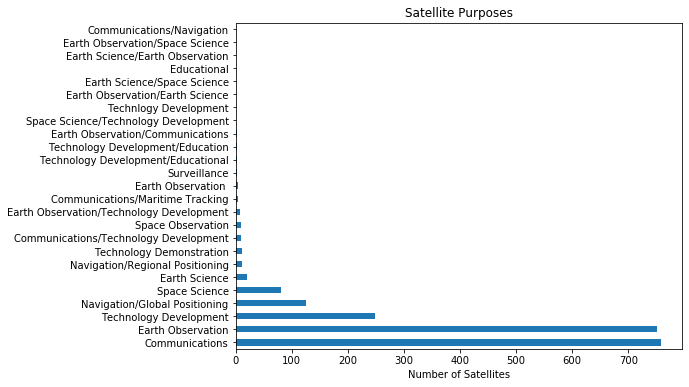

In [22]:
_ = plot_barh(df, "Purpose", "Satellite Purposes")

Who has the most?

With 99 entries, this may be difficult to visualize. Let's do the top 20.

In [23]:
df["Country of Operator/Owner"].value_counts()

USA                883
China              296
Russia             150
Japan               79
Multinational       63
                  ... 
France/Israel        1
Japan/Singapore      1
ESA/USA/Russia       1
Slovakia             1
Laos                 1
Name: Country of Operator/Owner, Length: 99, dtype: int64

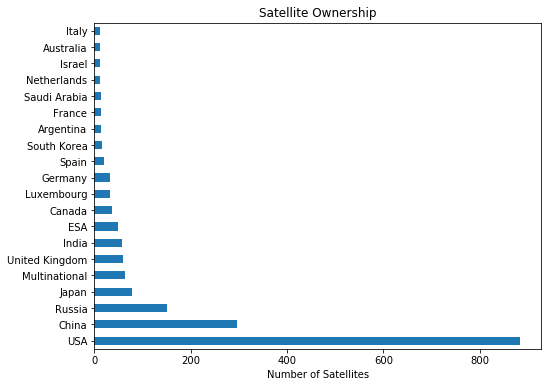

In [24]:
_ = plot_barh(df, "Country of Operator/Owner", "Satellite Ownership", 20)

Who are the users?

That data formatting is annoying. They are just supersets of each other. Think about how to fix that.

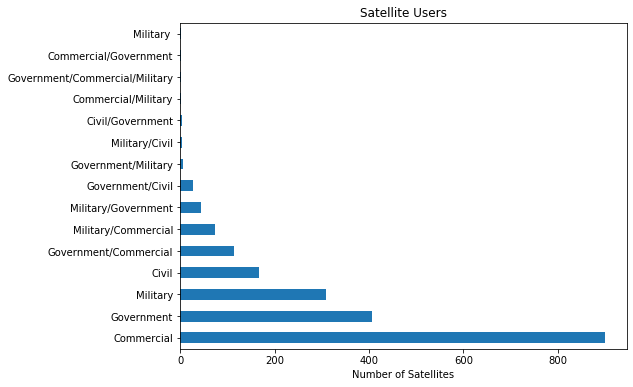

In [25]:
#_ = df["Users"].value_counts().plot(kind='barh')
_ = plot_barh(df, "Users", "Satellite Users")

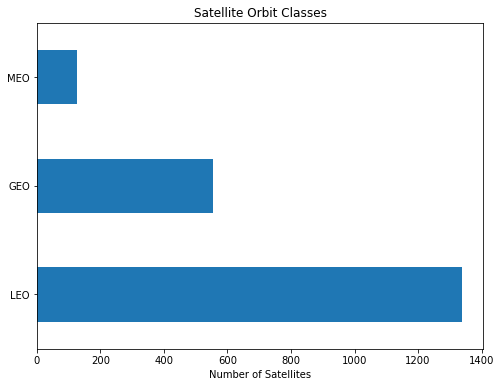

In [26]:
_ = plot_barh(df, "Class of Orbit", "Satellite Orbit Classes")

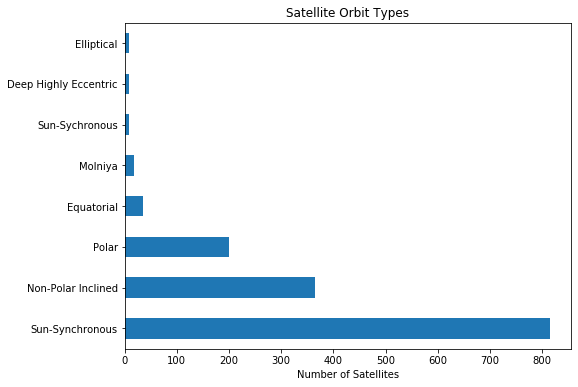

In [27]:
_ = plot_barh(df, "Type of Orbit", "Satellite Orbit Types")

### Some 2D Plots

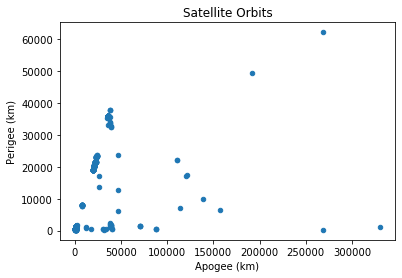

In [28]:
_ = df[["Apogee (km)", "Perigee (km)"]].plot(x='Apogee (km)', y='Perigee (km)', kind='scatter')
_ = plt.title('Satellite Orbits')

How long do satellites last?

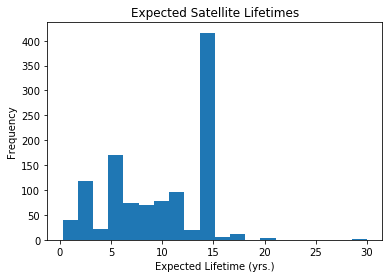

In [29]:
_ = df["Expected Lifetime (yrs.)"].plot.hist(bins=20)
_ = plt.xlabel("Expected Lifetime (yrs.)")
_ = plt.title("Expected Satellite Lifetimes")

Okay, but I want this in terms of when they were launched. This will require me to add together the launch date and the expected lifetime.

In [30]:
satellite_life_df = df[["Date of Launch", "Expected Lifetime (yrs.)"]].join(
    pd.Series(df["Date of Launch"] + pd.to_timedelta(df["Expected Lifetime (yrs.)"], unit='Y'),
              name="Expected End of Life")).dropna()
satellite_life_df.head()

/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/util/_decorators.py:208: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  return func(*args, **kwargs)


,Date of Launch,Expected Lifetime (yrs.),Expected End of Life
1,2017-06-23,2.0,2019-06-23 11:38:24
3,2014-02-06,15.0,2029-02-05 15:18:00
4,2016-06-15,15.0,2031-06-15 15:18:00
5,2015-03-02,15.0,2030-03-01 15:18:00
6,2004-03-13,12.0,2016-03-12 21:50:24


Okay, let's plot launch date vs end of life date.

I like the line structure of this plot.

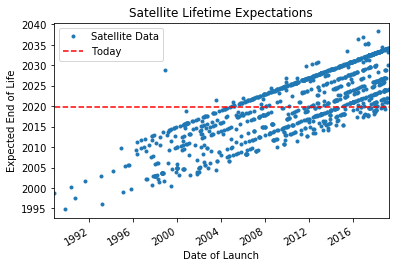

In [31]:
today = pd.to_datetime(datetime.date.today())
today_x = pd.date_range(df["Date of Launch"].min(), df["Date of Launch"].max(), periods=10)
today_y = pd.date_range(datetime.date.today(), datetime.date.today(), periods=10)

_ = satellite_life_df.set_index("Date of Launch").plot(y="Expected End of Life", style=".", label="Satellite Data")
_ = plt.ylabel("Expected End of Life")
_ = plt.plot(today_x, today_y, 'r--', label="Today")
_ = plt.legend()
_ = plt.title("Satellite Lifetime Expectations")

This plot shows satellite end-of-lifetime as a function of when they were launched. The red line shows today. Every point above the red line is a satellite that should still be working. Every plot below the red line is a satellite that we believe no longer works. Right?

In [32]:
print("Number of satellites in the database: %d" % len(df))
print("Number of satellites with lifetime predictions: %d" % len(satellite_life_df))
print("Number of satellites that should still be working: %d" %
     len(satellite_life_df[satellite_life_df["Expected End of Life"] > today]))
print("Number of satellites that should no longer be working: %d" %
     len(satellite_life_df[satellite_life_df["Expected End of Life"] < today]))

Number of satellites in the database: 2062
Number of satellites with lifetime predictions: 1124
Number of satellites that should still be working: 643
Number of satellites that should no longer be working: 481


Check Users more closely

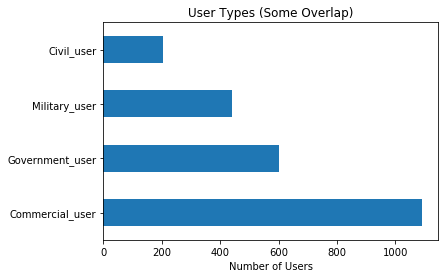

In [33]:
_ = df[user_col_names].sum().sort_values(ascending=False).plot(kind='barh')
_ = plt.xlabel('Number of Users')
_ = plt.title('User Types (Some Overlap)')

Check Purposes more closely

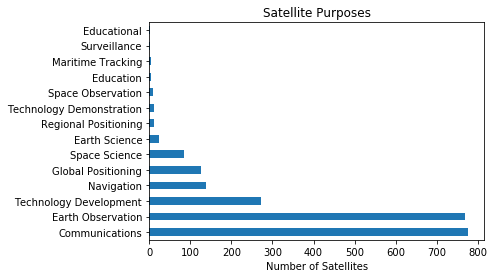

In [34]:
_ = df[purpose_cols].sum().sort_values(ascending=False).plot(kind="barh")
_ = plt.xlabel("Number of Satellites")
_ = plt.title("Satellite Purposes")

### Reproducing More Advanced Plots

Satellites Launched By User with dotted lines at the space ages of 1991 and 2012? Stacked and Filled line plot

Satellites Launched By Purpose, stacked bar graph

In [35]:
df_by_launch_date = df.set_index("Date of Launch").sort_index()
df_by_launch_date.head()

,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),...,Earth Science,Maritime Tracking,Space Science,Navigation,Global Positioning,Space Observation,Educational,Education,Surveillance,Regional Positioning
Date of Launch,,,,,,,,,,,,,,,,,,,,,
1974-11-15,Amsat-Oscar 7 (AO-7),USA,USA,AMSAT-NA,Civil,Communications,NaN,LEO,Polar,0.0,...,False,False,False,False,False,False,False,False,False,False
1988-09-29,"TDRS-3 (Tracking and Data Relay Satellite, TDR...",USA,USA,National Aeronautics and Space Administration ...,Government,Communications,NaN,GEO,NaN,84.4,...,False,False,False,False,False,False,False,False,False,False
1989-09-25,FLTSATCOM-8 (USA 46),USA,USA,US Navy,Military,Communications,NaN,GEO,NaN,-14.7,...,False,False,False,False,False,False,False,False,False,False
1990-04-25,"Hubble Space Telescope (HST, Space Telescope)",USA,ESA/USA,European Space Agency (ESA)/NASA,Government,Space Science,NaN,LEO,Non-Polar Inclined,0.0,...,False,False,True,False,False,False,False,False,False,False
1990-08-30,Skynet 4C,United Kingdom,United Kingdom,Intelsat/Paradigm Secure Communications (wholl...,Military,Communications,NaN,GEO,NaN,-1.3,...,False,False,False,False,False,False,False,False,False,False


In [36]:
type(df_by_launch_date.index)

pandas.core.indexes.datetimes.DatetimeIndex

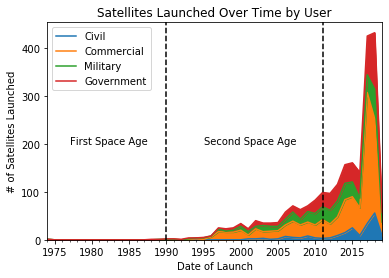

In [37]:
# Plot Data
_ = df_by_launch_date.resample('A').sum()[user_col_names].plot(kind='area')
_.legend(["Civil", "Commercial", "Military", "Government"])

# Plot Space Age Lines
_ = plt.axvline(pd.to_datetime('1990-12-31'), color='k', linestyle='--')
_ = plt.axvline(pd.to_datetime('2011-12-31'), color='k', linestyle='--')

# Plot Annotations
_ = plt.annotate('First Space Age', (7, 200))
_ = plt.annotate('Second Space Age', (25, 200))

# Axis Label and Title
_ = plt.ylabel("# of Satellites Launched")
_ = plt.title("Satellites Launched Over Time by User")

Weird. If you specify kind='bar' vs kind='line', the default format for the date labels changes.

Ahhh, plotting as a bar chart changes the xvalues from dates to floats: https://stackoverflow.com/questions/19410617/unable-to-adjust-x-axis-dateformat-in-pandas-bar-chart

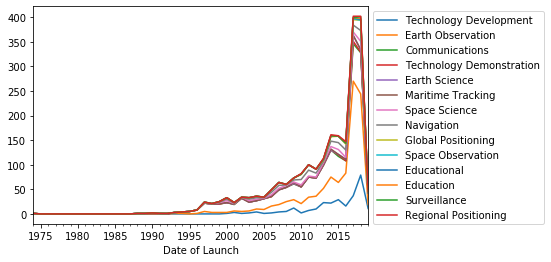

In [38]:
_ = df_by_launch_date.resample('A').sum()[purpose_cols].plot(kind='line', stacked=True)
_ = plt.legend(bbox_to_anchor=(1, 1))

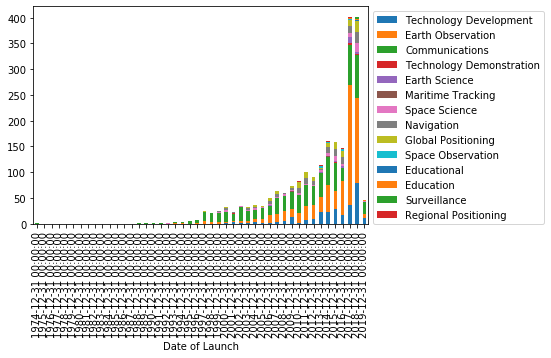

In [39]:
_ = df_by_launch_date.resample('A').sum()[purpose_cols].plot(kind='bar', stacked=True)
_ = plt.legend(bbox_to_anchor=(1, 1))

Okay let's make the real plot

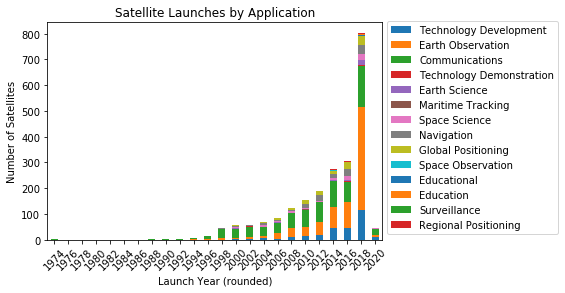

In [40]:
# Set up Figure
# Need this so that we can finagle some formatting
fig, ax = plt.subplots()
_ = df_by_launch_date.resample('2A').sum()[purpose_cols].plot(kind='bar', stacked=True, ax=ax)
_ = plt.legend(bbox_to_anchor=(1, 1.03))

# Set the axis labels to be just years
ax.set_xticklabels([dt.strftime('%Y') for dt in df_by_launch_date.resample('2A').sum().index],
                   rotation=45)

# Axis labels and title
_ = plt.xlabel('Launch Year (rounded)')
_ = plt.ylabel('Number of Satellites')
_ = plt.title('Satellite Launches by Application')

plt.show()

Let's make a version with only recent data

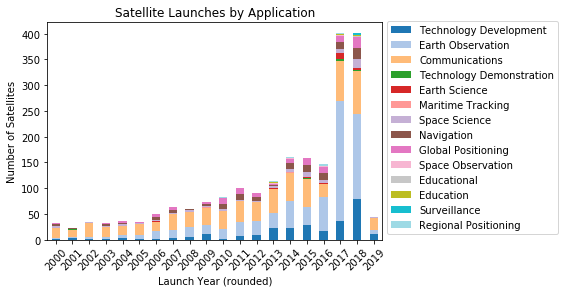

In [41]:
# Set up Figure
# Need this so that we can finagle some formatting
fig, ax = plt.subplots()
_ = df_by_launch_date.loc['2000':].resample('A').sum()[purpose_cols].plot(kind='bar', 
                                                                          stacked=True, 
                                                                          ax=ax,
                                                                          colormap='tab20')
_ = plt.legend(bbox_to_anchor=(1, 1.03))

# Set the axis labels to be just years
ax.set_xticklabels([dt.strftime('%Y') for dt in df_by_launch_date.loc['2000':].resample('A').sum().index],
                   rotation=45)

# Axis labels and title
_ = plt.xlabel('Launch Year (rounded)')
_ = plt.ylabel('Number of Satellites')
_ = plt.title('Satellite Launches by Application')

plt.show()

## Open Satellite Data

https://scihub.copernicus.eu/catalogueview/S1A/2019/01/

In [3]:
from dask.distributed import LocalCluster, Client, wait, progress

In [4]:
cluster = LocalCluster()

In [5]:
cluster

In [6]:
import intake
import xarray as xr

/srv/conda/envs/notebook/lib/python3.7/site-packages/intake/source/discovery.py:136: FutureWarning: The drivers ['stac-catalog', 'stac-collection', 'stac-item'] do not specify entry_points and were only discovered via a package scan. This may break in a future release of intake. The packages should be updated.
  FutureWarning)


### Catalog of products (ie no actual data in here)

In [48]:
scihub_catalog_url = 'https://scihub.copernicus.eu/catalogueview/S1A/2019/01/'
scihub_catalog = intake.source.csv.CSVSource(scihub_catalog_url + "*.csv")
scihub_catalog

In [49]:
scihub_catalog.discover()

{'datashape': None,
 'dtype': {'Id': 'object',
  'Name': 'object',
  'ContentLength': 'int64',
  'IngestionDate': 'object',
  'ContentDate:Start': 'object',
  'ContentDate:End': 'object',
  'Checksum:Algorithm': 'object',
  'Checksum:Value': 'object'},
 'shape': (None, 8),
 'npartitions': 31,
 'metadata': {}}

In [50]:
scihub_as_dask = scihub_catalog.to_dask()
scihub_as_dask

,Id,Name,ContentLength,IngestionDate,ContentDate:Start,ContentDate:End,Checksum:Algorithm,Checksum:Value
npartitions=31,,,,,,,,
,object,object,int64,object,object,object,object,object
,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...


In [51]:
scihub_as_dask.head()

,Id,Name,ContentLength,IngestionDate,ContentDate:Start,ContentDate:End,Checksum:Algorithm,Checksum:Value
0,0038d985-dcac-49f9-8a56-bec25f28273e,S1A_IW_OCN__2SDV_20190101T194111_20190101T1941...,6331410,2019-01-02T03:06:11.707,2019-01-01T19:41:11.174,2019-01-01T19:41:36.174,MD5,05B80C1C1FD51BFF928F716FD48B8417
1,0051976b-98ed-4b99-a990-9da1db899dff,S1A_IW_OCN__2SSH_20190101T013807_20190101T0138...,7554634,2019-06-24T13:34:18.785,2019-01-01T01:38:07.770,2019-01-01T01:38:38.383,MD5,234E54FD3E145A9884DB2EAC14B1F994
2,007f7afd-ef98-4f83-b700-82a581556157,S1A_IW_GRDH_1SDV_20190101T011139_20190101T0112...,966014735,2019-01-01T06:49:42.453,2019-01-01T01:11:39.747,2019-01-01T01:12:08.767,MD5,5C9DD7A32AB3E1EB0491817E8EA85B24
3,00848b93-0404-4f3a-9e3c-647246da262e,S1A_IW_SLC__1SDV_20190101T135552_20190101T1356...,4003118188,2019-01-01T17:37:59.415,2019-01-01T13:55:52.476,2019-01-01T13:56:19.441,MD5,63435C761A32741667D8AC2BB4B97E2D
4,0086f471-3cbf-48d5-87ff-f448aaa3355b,S1A_IW_RAW__0SDV_20190101T171242_20190101T1713...,1592551127,2019-01-01T18:18:51.694,2019-01-01T17:12:42.374,2019-01-01T17:13:14.774,MD5,90B68078E90ADB60B0B6DE23FC859C25


The following query will return a csv file of sources with some polygons. However, this is the OData API, which is not the actual data. The actual data is from the OpenData API.

In [7]:
scihub_data_url = 'https://scihub.copernicus.eu/apihub/odata/v1/Products'
data_format = '?$format=text/csv&year(IngestionDate)=2017&month(IngestionDate)=12'

Old Query Idea 

data_id = scihub_as_dask.head().loc[0,'Id']

data_id

In [11]:
data_query = scihub_data_url \
                + data_format
                #+ '('\
                #+ data_id + ')'\
scihub_data = intake.source.csv.CSVSource(data_query)
scihub_data

In [12]:
data_query

'https://scihub.copernicus.eu/apihub/odata/v1/Products?$format=text/csv&year(IngestionDate)=2017&month(IngestionDate)=12'

In [13]:
scihub_data.read()

ValueError: Backing filesystem couldn't determine file size, cannot do chunked reads. To read, set blocksize=None.